In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the trained model
model = load_model("emotion_model.h5")

# Recompile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model recompiled successfully!")


Model recompiled successfully!


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_width, img_height = 48, 48
batch_size = 64

# Path to the test dataset
test_dir = "datasets/test"  # Update this path if needed

# Data Augmentation for testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    color_mode="grayscale",  # Convert to grayscale
    batch_size=batch_size,
    class_mode="categorical"  # One-hot encode labels
)

# Print the number of samples
print(f"Testing samples: {test_generator.samples}")


Found 7178 images belonging to 7 classes.
Testing samples: 7178


In [3]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\shrey\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5558 - loss: 1.1758
Test Loss: 1.1600
Test Accuracy: 55.75%


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the trained model
model = load_model("emotion_model.h5")

# Recompile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [5]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5614 - loss: 1.1461
Test Loss: 1.1600
Test Accuracy: 55.75%


In [6]:
# Predicted on 1 image
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Load the image and convert to grayscale
img_path = "datasets/test/happy/PrivateTest_9549216.jpg"  # Replace with your image path
img = Image.open(img_path).convert("L")  # Convert to grayscale (L mode)
img = img.resize((48, 48))  # Resize to (48, 48)
img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the emotion
predictions = model.predict(img_array)
emotion_index = np.argmax(predictions)
predicted_emotion = emotion_labels[emotion_index]

print(f"Predicted Emotion: {predicted_emotion}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Emotion: Happy


In [7]:
# Predicting on all text images
import pandas as pd

# Create a DataFrame to store predictions
results = []

# Predict on the test dataset
for images, labels in test_generator:
    predictions = model.predict(images)
    for i in range(len(predictions)):
        true_label = np.argmax(labels[i])
        predicted_label = np.argmax(predictions[i])
        results.append({
            "True Emotion": emotion_labels[true_label],
            "Predicted Emotion": emotion_labels[predicted_label]
        })
    break  # Remove this line to process all batches

# Save predictions to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv("test_predictions.csv", index=False)
print("Predictions saved to 'test_predictions.csv'")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Predictions saved to 'test_predictions.csv'


In [8]:
#Reviewing the file 
import pandas as pd

# Load the CSV file
predictions_df = pd.read_csv("test_predictions.csv")

# Display the column names
print(predictions_df.columns)



Index(['True Emotion', 'Predicted Emotion'], dtype='object')


In [9]:
# Calculate accuracy
accuracy = (predictions_df["True Emotion"] == predictions_df["Predicted Emotion"]).mean()
print(f"Accuracy from CSV: {accuracy * 100:.2f}%")


Accuracy from CSV: 53.12%


In [10]:
misclassified = predictions_df[predictions_df["True Emotion"] != predictions_df["Predicted Emotion"]]


In [11]:
import pandas as pd

# Load the predictions CSV file
predictions_df = pd.read_csv("test_predictions.csv")

# Display the column names and the first few rows
print(predictions_df.columns)
print(predictions_df.head())


Index(['True Emotion', 'Predicted Emotion'], dtype='object')
  True Emotion Predicted Emotion
0        Happy             Happy
1         Fear             Happy
2          Sad             Angry
3      Neutral           Neutral
4      Neutral             Angry


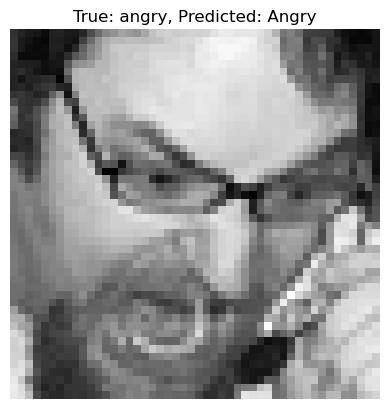

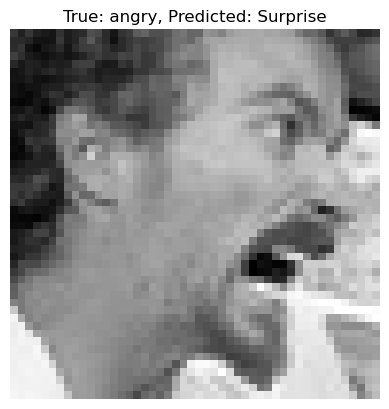

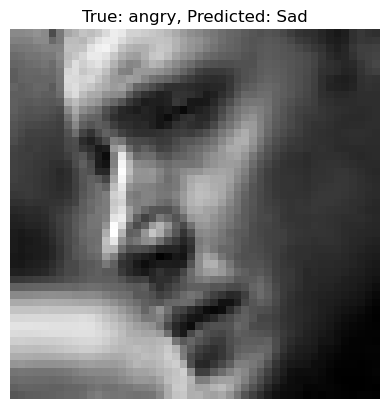

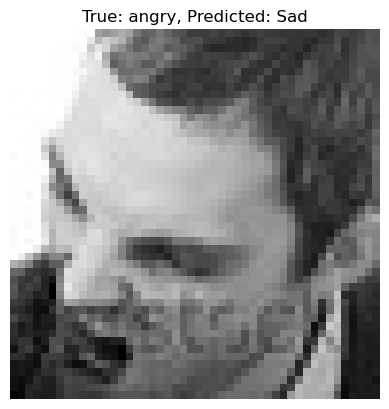

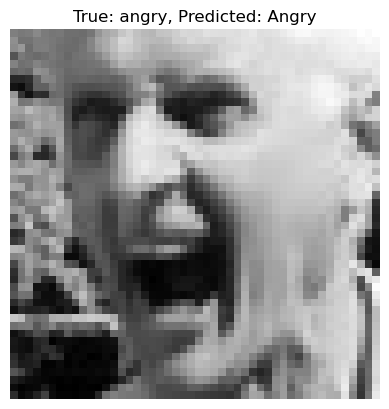

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the corrected CSV
predictions_df = pd.read_csv("test_predictions_with_images.csv")

# Identify misclassified samples
misclassified = predictions_df[predictions_df["True Emotion"] != predictions_df["Predicted Emotion"]]

# Visualize a few misclassified images
for i, row in misclassified.head(5).iterrows():
    # Construct the image path
    img_path = f"datasets/test/{row['True Emotion']}/{row['Image']}"
    img = Image.open(img_path).convert("L").resize((48, 48))  # Convert to grayscale
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {row['True Emotion']}, Predicted: {row['Predicted Emotion']}")
    plt.axis("off")
    plt.show()


In [13]:
# Inspect the DataFrame
print(predictions_df.isnull().sum())  # Check for NaN values in each column
print(predictions_df.head())          # View the first few rows


Image                0
True Emotion         0
Predicted Emotion    0
dtype: int64
                      Image True Emotion Predicted Emotion
0  PrivateTest_10131363.jpg        angry             Angry
1  PrivateTest_10304478.jpg        angry          Surprise
2   PrivateTest_1054527.jpg        angry               Sad
3  PrivateTest_10590091.jpg        angry               Sad
4   PrivateTest_1109992.jpg        angry             Angry


In [14]:
# Drop rows with NaN values
predictions_df = predictions_df.dropna()

# Verify there are no NaN values
print(predictions_df.isnull().sum())


Image                0
True Emotion         0
Predicted Emotion    0
dtype: int64


In [15]:
# Check if all labels are valid
valid_labels = set(emotion_labels)  # Ensure all labels are from the defined emotion_labels
invalid_true = set(predictions_df["True Emotion"]) - valid_labels
invalid_pred = set(predictions_df["Predicted Emotion"]) - valid_labels

print(f"Invalid True Labels: {invalid_true}")
print(f"Invalid Predicted Labels: {invalid_pred}")


Invalid True Labels: {'surprise', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'angry'}
Invalid Predicted Labels: set()


In [16]:
# Map emotion labels to numeric indices
label_map = {label: i for i, label in enumerate(emotion_labels)}

# Convert true and predicted labels to numeric indices
true_labels = predictions_df["True Emotion"].map(label_map)
predicted_labels = predictions_df["Predicted Emotion"].map(label_map)

# Print unique values after mapping
print("Mapped True Labels:", true_labels.unique())
print("Mapped Predicted Labels:", predicted_labels.unique())


Mapped True Labels: [nan]
Mapped Predicted Labels: [0 6 5 2 4 3 1]


In [17]:
print("Unique True Labels:", predictions_df["True Emotion"].unique())
print("Unique Predicted Labels:", predictions_df["Predicted Emotion"].unique())
print("Expected Emotion Labels:", emotion_labels)


Unique True Labels: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Unique Predicted Labels: ['Angry' 'Surprise' 'Sad' 'Fear' 'Neutral' 'Happy' 'Disgust']
Expected Emotion Labels: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [18]:
# Convert both columns and emotion_labels to lowercase for consistency
predictions_df["True Emotion"] = predictions_df["True Emotion"].str.lower()
predictions_df["Predicted Emotion"] = predictions_df["Predicted Emotion"].str.lower()
emotion_labels = [label.lower() for label in emotion_labels]

# Check again for mismatches
print("Unique True Labels (After Normalization):", predictions_df["True Emotion"].unique())
print("Unique Predicted Labels (After Normalization):", predictions_df["Predicted Emotion"].unique())
print("Expected Emotion Labels (After Normalization):", emotion_labels)


Unique True Labels (After Normalization): ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Unique Predicted Labels (After Normalization): ['angry' 'surprise' 'sad' 'fear' 'neutral' 'happy' 'disgust']
Expected Emotion Labels (After Normalization): ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [19]:
# Recreate label_map
label_map = {label: i for i, label in enumerate(emotion_labels)}

# Map true and predicted labels to numeric indices
true_labels = predictions_df["True Emotion"].map(label_map)
predicted_labels = predictions_df["Predicted Emotion"].map(label_map)

# Verify mapped labels
print("Mapped True Labels:", true_labels.unique())
print("Mapped Predicted Labels:", predicted_labels.unique())


Mapped True Labels: [0 1 2 3 4 5 6]
Mapped Predicted Labels: [0 6 5 2 4 3 1]


In [20]:
# Check rows with NaN values after mapping
nan_rows = predictions_df[true_labels.isna() | predicted_labels.isna()]
print("Rows with NaN after mapping:", nan_rows)


Rows with NaN after mapping: Empty DataFrame
Columns: [Image, True Emotion, Predicted Emotion]
Index: []


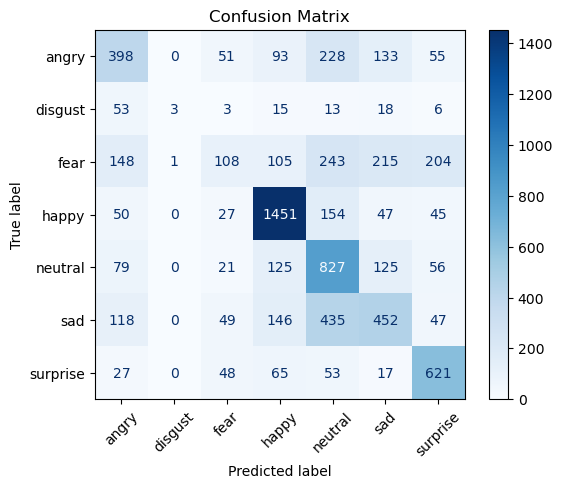

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(emotion_labels)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [22]:
from PIL import Image
import numpy as np

# Path to a new image (replace with the actual path)
img_path = "datasets/test/happy/PrivateTest_9549216.jpg"

# Load and preprocess the image
img = Image.open(img_path).convert("L").resize((48, 48))  # Convert to grayscale and resize
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the emotion
predictions = model.predict(img_array)
emotion_index = np.argmax(predictions)
predicted_emotion = emotion_labels[emotion_index]

print(f"Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Emotion: happy


In [23]:
!pip install opencv-python


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("emotion_model.h5")

# Emotion labels and personalized recommendations
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
recommendations = {
    'angry': "Take a deep breath and relax. Consider listening to calming music or practicing mindfulness.",
    'disgust': "Try to focus on something you enjoy or take a walk to clear your mind.",
    'fear': "It’s okay to feel scared. Talk to someone you trust or write your thoughts in a journal.",
    'happy': "Keep smiling! Share your happiness with others or capture the moment in a photo.",
    'neutral': "A neutral state is great for focusing. Take this opportunity to plan or organize your day.",
    'sad': "It’s okay to feel sad. Listen to your favorite music or call a loved one for support.",
    'surprise': "Enjoy the moment! Share your excitement or take a break to process the surprise."
}

# Initialize webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract face region
        roi_gray = gray_frame[y:y+h, x:x+w]  # Region of interest
        roi_gray = cv2.resize(roi_gray, (48, 48)) / 255.0  # Resize and normalize
        roi_gray = np.expand_dims(roi_gray, axis=-1)  # Add channel dimension
        roi_gray = np.expand_dims(roi_gray, axis=0)  # Add batch dimension

        # Predict emotion
        predictions = model.predict(roi_gray)
        emotion_index = np.argmax(predictions)
        emotion_label = emotion_labels[emotion_index]

        # Get the personalized recommendation
        recommendation = recommendations[emotion_label]

        # Draw rectangle and emotion label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Display the recommendation on the frame
        cv2.putText(frame, recommendation, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Display the video feed
    cv2.imshow("Emotion Detection with Recommendations", frame)

    # Break if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exiting...")
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━